In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../input/insurance/insurance.csv')

# Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Exploratory Data Analysis

Univariate Analysis

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df['age'].value_counts()[:30]

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
Name: age, dtype: int64

<AxesSubplot:ylabel='Frequency'>

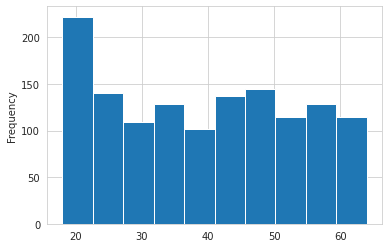

In [9]:
df['age'].plot(kind = 'hist')

In [10]:
age_des = df['age'].describe()
age_des.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64>

Text(0.5, 1.0, 'Age Distribution')

<Figure size 720x1152 with 0 Axes>

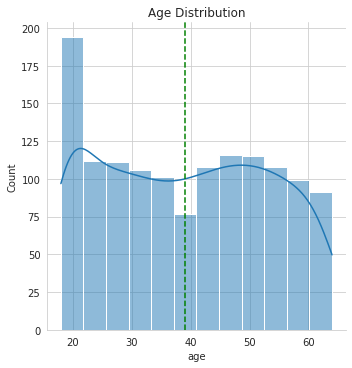

In [11]:
plt.figure(figsize=(10, 16))
ax = sns.displot(data = df, x = 'age', kde = True)

plt.axvline(39, linestyle = '--', color = 'green', label = 'mean Age')
plt.title('Age Distribution')

In [12]:
labels = df['age'].value_counts().keys().to_list()
values = df['age'].value_counts().to_list()

fig = go.Figure(go.Pie(labels=labels, 
                      values=values,
                      hole=0.5))
fig.show()

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
fig = px.box(df['age'],
            title = "Age Distribution")
fig.show()

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gender of the peoples')

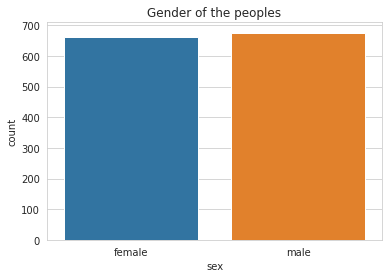

In [16]:
sns.countplot(df['sex'])
plt.title("Gender of the peoples")

<AxesSubplot:ylabel='Frequency'>

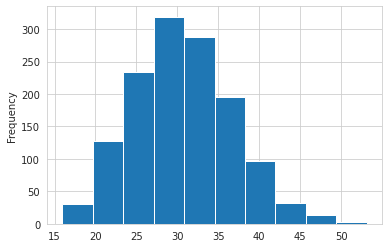

In [17]:
#Analysis of BMI

df['bmi'].plot(kind = 'hist')

Text(0.5, 1.0, 'BMI distribution')

<Figure size 1152x432 with 0 Axes>

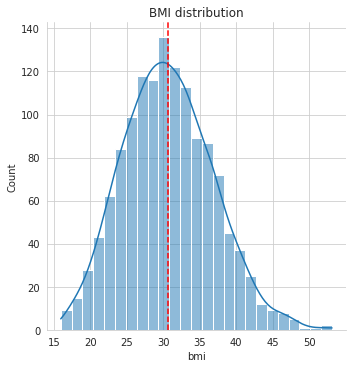

In [18]:
bmi_des = df['bmi'].describe()

plt.figure(figsize=(16,6))
sns.displot(df['bmi'], kde = True)
plt.axvline(bmi_des['mean'], linestyle = "--", color = "red")
plt.title('BMI distribution')

In [19]:
fig = px.box(df['bmi'],
            title="BMI Distribution")

fig.show()

In [20]:
fig = px.histogram(data_frame=df, x = "bmi")
fig.show()

<AxesSubplot:ylabel='Frequency'>

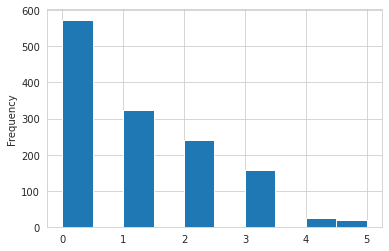

In [21]:
#Analysis of children
df['children'].plot(kind = "hist")

In [22]:
child_m = df['children'].describe()
child_m['mean']

1.0949177877429

Mean value of children: 1.0949177877429


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Children')

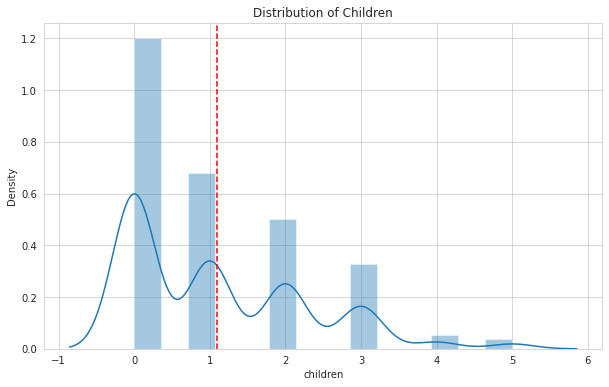

In [23]:
print('Mean value of children: {}'.format(child_m['mean']))

plt.figure(figsize=(10, 6))
sns.distplot( df['children'])
plt.axvline(child_m['mean'], linestyle = "--", color = "red", )
plt.title("Distribution of Children")

In [24]:
fig = px.histogram(data_frame= df, x='children')
fig.show()

In [25]:
#Analysis of smoker
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='smoker', ylabel='count'>

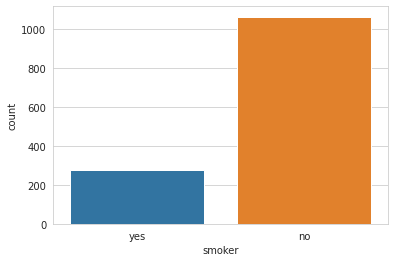

In [26]:
sns.countplot(df['smoker'])

In [27]:
keys = df['smoker'].value_counts().keys().to_list()
values = df['smoker'].value_counts().to_list()
fig = go.Figure(go.Pie(labels=keys,
                      values= values, 
                      hole = 0.5))
fig.show()

In [28]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='region', ylabel='count'>

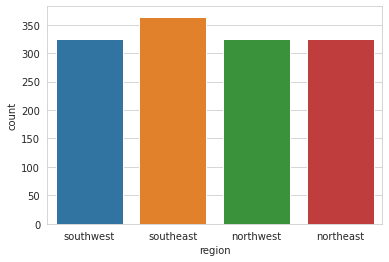

In [29]:
sns.countplot(df['region'])

<AxesSubplot:ylabel='Frequency'>

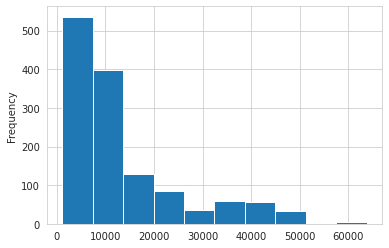

In [30]:
#Analysis of charges
df['charges'].plot(kind = 'hist')

In [31]:
charges_m = df['charges'].describe()
charges_m['mean']

13270.422265141257

Mean value of  charges: 13270.422265141257


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



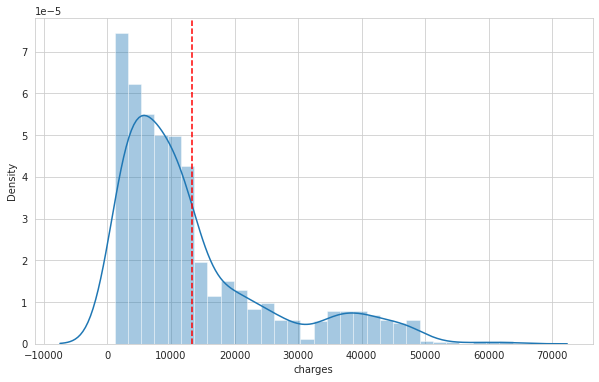

In [32]:
print('Mean value of  charges: {}'.format(charges_m['mean']))
plt.figure(figsize=(10, 6))
sns.distplot(df['charges'])
plt.axvline(charges_m['mean'], linestyle = '--', color = "red")
plt.show()

Bivariate Analysis

In [33]:
fig = px.histogram(data_frame=df, x = 'age', color = 'sex', title = "Age and Gender ")
fig.show()

In [34]:
fig = px.histogram(data_frame=df, x = 'age', color = 'smoker')
fig.show()

In [35]:
px.histogram(data_frame=df, x = 'age', color = 'children')

In [36]:
px.scatter(data_frame=df, x = 'charges', color = 'sex', title='Distribution of charges')

<AxesSubplot:>

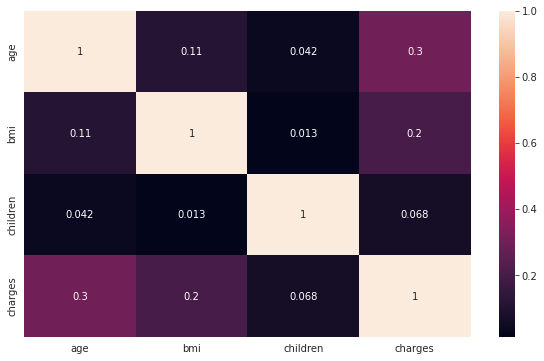

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr().T, annot=True)